<h1> Linear regression

<H2> Question 1

A popular restaurant review website has released the dataset you can download from Canvas.

Here each row represents an average rating of a restaurant’s different aspects as provided by previous customers. The dataset contains records for the restaurants using the following attributes:

ambience, food, service, and overall rating.

The first three attributes
are predictor variables and the remaining one is the outcome.

Use a linear regression model to predict how the predictor attributes impact the overall rating of the restaurant.


First, express the linear regression in mathematical form. Then, try solving it by hand as we did in class. Here, you will have four parameters (the constant, and the three attributes), with one predictor.

You do not have to actually solve this with all possible values for these
parameters. Rather, show a couple of possible sets of values for the parameters with the predictor value calculated.

### Part a
Simple Linear Regression Math by Hand

There are just a handful of steps in linear regression.
<ul>
    <li>Step 1: Calculate X*Y, X<sup>2</sup>, and Y<sup>2</sup></li>
    <li>Step 2: Calculate ΣX, ΣY, ΣX*Y, ΣX<sup>2</sup>, and ΣY<sup>2</sup></li>
    <li>Step 3: Calculate b<sub>0</sub></li>
    <li>Step 4: Calculate b<sub>1</sub></li>
    <li>Step 5: Place b<sub>0</sub> and b<sub>1</sub> in the estimated linear regression equation.</li>
</ul>

The estimated linear regression equation is: ŷ = b<sub>0</sub> + b<sub>1</sub>*x

The formula to calculate b<sub>0</sub> is: [(ΣY)(ΣX<sup>2</sup>) – (ΣX)(ΣX*Y)]  /  [n(ΣX<sup>2</sup>) – (ΣX)<sup>2</sup>]

The formula to calculate b<sub>1</sub> is: [n(ΣXY) – (ΣX)(ΣY)]  /  [n(ΣX<sup>2</sup>) – (ΣX)<sup>2</sup>]



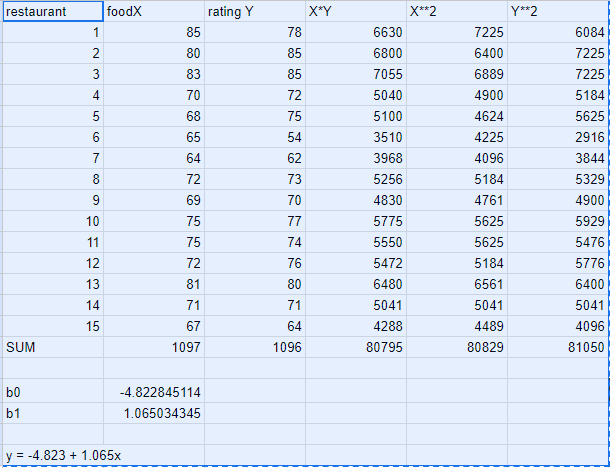

### Part b

Finally, use python to find the linear regression model and report it in
appropriate terms (do not just dump the output from python)

I have included the solution below please read through the code.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
#Reading the data (note this is a tab seperated file)
ratingData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab 5/ratings.tsv', sep='\t')
ratingData.head()

,restaurant,food,ambience,service,rating
0,1,85,82,89,78
1,2,80,90,80,85
2,3,83,86,83,85
3,4,70,96,75,72
4,5,68,80,78,75


In [ ]:
#Dropping null values
ratingData = ratingData.dropna()

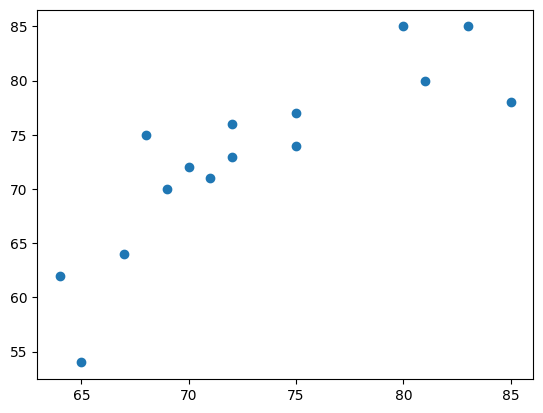

In [ ]:
#Scatter plot of food and rating
plt.scatter(ratingData.food, ratingData.rating)
plt.show()

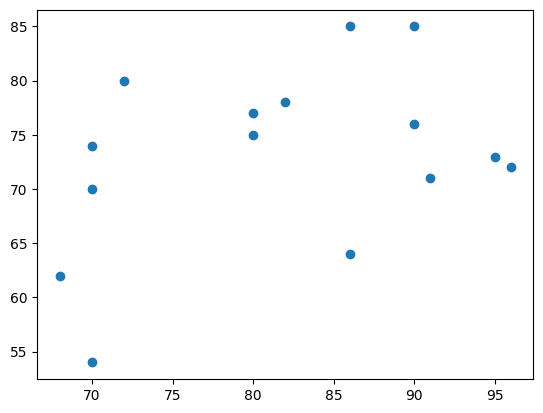

In [ ]:
#Scatter plot of ambience and rating
plt.scatter(ratingData.ambience, ratingData.rating)
plt.show()

In [ ]:
#Creating X and y and making a linear model
X = ratingData.drop('rating', axis=1)
X = sm.add_constant(X)
lr_model = sm.OLS(ratingData.rating, X).fit()
lr_model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     9.654
Date:                Mon, 09 Oct 2023   Prob (F-statistic):            0.00183
Time:                        10:16:50   Log-Likelihood:                -40.685
No. Observations:                  15   AIC:                             91.37
Df Residuals:                      10   BIC:                             94.91
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.9395     17.133     -0.930      0.374     -54.114      22.235
restaurant     0.0026      0.285      0.009      0.993      -0.632       0.637
food           0.7345      0.285      2.579      0.027       0.100       1.369
ambience       0.1339      0.132      1.018      0.333      -0.159       0.427
service        0.3238      0.233      1.387      0.195      -0.196       0.844
==============================================================================
Omnibus:                        3.856   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.309
Skew:                          -0.961   Prob(JB):                        0.315
Kurtosis:                       3.001   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 2
For the next exercise, you are going to use the Airline Costs dataset available to download from airline_costs_new.csv The dataset has the following attributes, among others:
<ol>
<li>Airline name</li>
<li>Length of flight in miles
</li>
<li>Speed of plane in miles per hour
</li>
<li>Daily flight time per plane in hours
</li>
<li>Customers served in 1000s
</li>
<li>Total operating cost in cents per revenue ton-mile
</li>
<li>Total assets in 100,000s </li>
<li>Investments and special funds in 100,000s
</li>
</ol>


Use a linear regression model to predict the number of customers each airline serves from its length of flight and daily flight time per plane.

Next, build another regression model to predict the total assets of an airline from the customers served by the airline.

Do you have any insight about the data from the last two regression models?

In [ ]:
costs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab 5/airline_costs_new.csv")
costs.head()

,Airline,Length,Speed,Daily_flight_time,Population,Operating_cost,Revenue,Ton-mile,Available,Total_assets,Investments,Adjusted_assets
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
features = ['Length', 'Daily_flight_time']
X = costs[features]
Y = costs['Population']
trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2)

model1 = LinearRegression()

model1.fit(trainX, trainY)


print(model1.intercept_, model1.coef_, model1.score(trainX, trainY))

model1.predict(testX)

-8887.489939050934 [185.06507514  42.64032782] 0.6196226952345113


array([ 4786.42580856, 41362.78572327, 23637.89962743,  8797.30214382,
       18026.25091416, 23865.60503039, 23965.3894499 ])

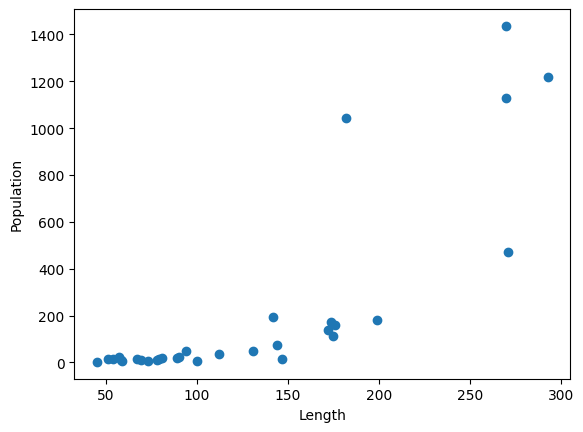

In [66]:
plt.scatter(costs['Length'], Y)
plt.xlabel("Length")
plt.ylabel("Population")
plt.show()

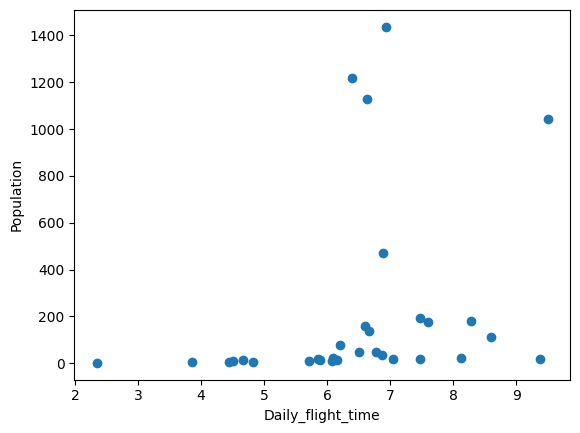

In [67]:
plt.scatter(costs['Daily_flight_time'], Y)
plt.xlabel("Daily_flight_time")
plt.ylabel("Population")
plt.show()

In [69]:
import numpy as np
X = costs['Population']
Y = costs['Total_assets']

trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2)

model2 = LinearRegression()


arr = np.array(trainX)
model2.fit(arr.reshape(-1,1), trainY)

model2

LinearRegression()